# Digital Marketing Analysis and Conversion Prediction

## Introduction
This analysis aims to offer marketing guidance and insights to a company based on demographics, customer engagement with marketing materials, and historical purchasing behavior.
In the competitive landscape of e-commerce, achieving high conversion rates is crucial for driving sales and maximizing revenue.


## Business Problem

An e-commerce company is looking to enhance the effectiveness of its digital marketing campaigns. Despite having a significant reach and engagement, the company is not achieving its desired conversion rates, which impacts overall sales and revenue. The company wants to understand the factors that influence customer conversions, such as demographics, customer engagement with marketing materials, and historical purchasing behavior.

**Objectives**:

- **Main objective**: Develop a predictive model using the dataset to identify which customers are most likely to convert (make a purchase) after interacting with digital marketing campaigns.

- Optimize Marketing Spend: Allocate budget more effectively by targeting customers who are more likely to convert, thus reducing cost per acquisition.

- Personalize Marketing Strategies: Tailor marketing messages and offers to different customer segments based on their likelihood to convert.

- Improve Customer Retention: Identify at-risk customers who are less likely to convert and develop strategies to re-engage them.

## Data Understanding

The data for this analysis was obtained from [kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data). 
This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data.

### Data Cleaning and Preperation 

The data was rather clean from the source.   
The activities conducted include:

1. Checking for missing values.
2. Checking for duplicates. 
3. Feature selection.



In [101]:
# import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [71]:
# read data
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [3]:
df.shape

(8000, 20)

In [4]:
df.info()

# no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [74]:
#check for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis
1. Univariate Analysis
2. Bivariate Analysis

### 1. Univariate Analysis

#### 1.1 Age

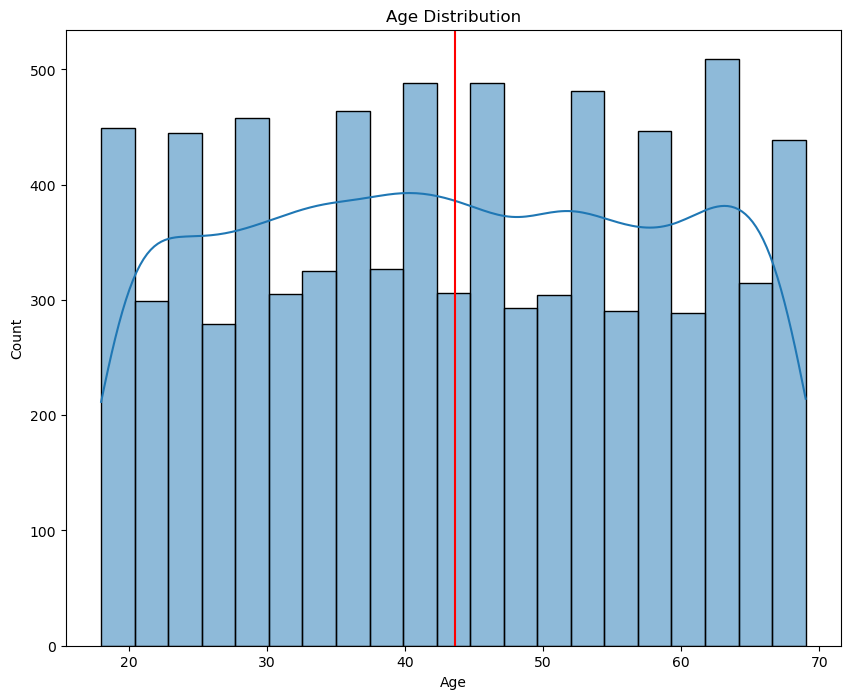

The mean age is:  43.6255
The median age is:  43.0


In [76]:
# plot an age histogram

plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', kde=True)

mean = df['Age'].mean() # 43.6255

plt.axvline(x=mean, color= 'r')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show();

print("The mean age is: ",mean)
print("The median age is: ",df['Age'].median())

#### 1.2 Gender

In [6]:
df['Gender'].value_counts()


Gender
Female    4839
Male      3161
Name: count, dtype: int64

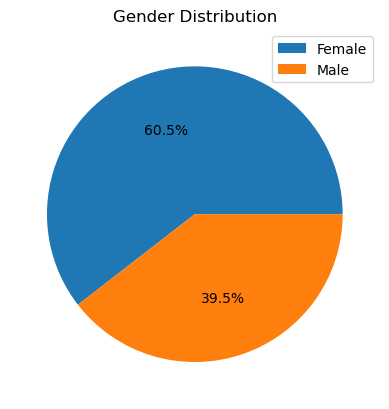

In [7]:
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Gender Distribution');
plt.legend(labels=df['Gender'].value_counts().index)

Approximately **60.5%** of the individuals in the dataset are female. 

Marketing strategies or campaigns could be adjusted to cater more to female preferences or interests, depending on the product or service being marketed.

#### 1.3 Campaign Channel

In [8]:
df['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

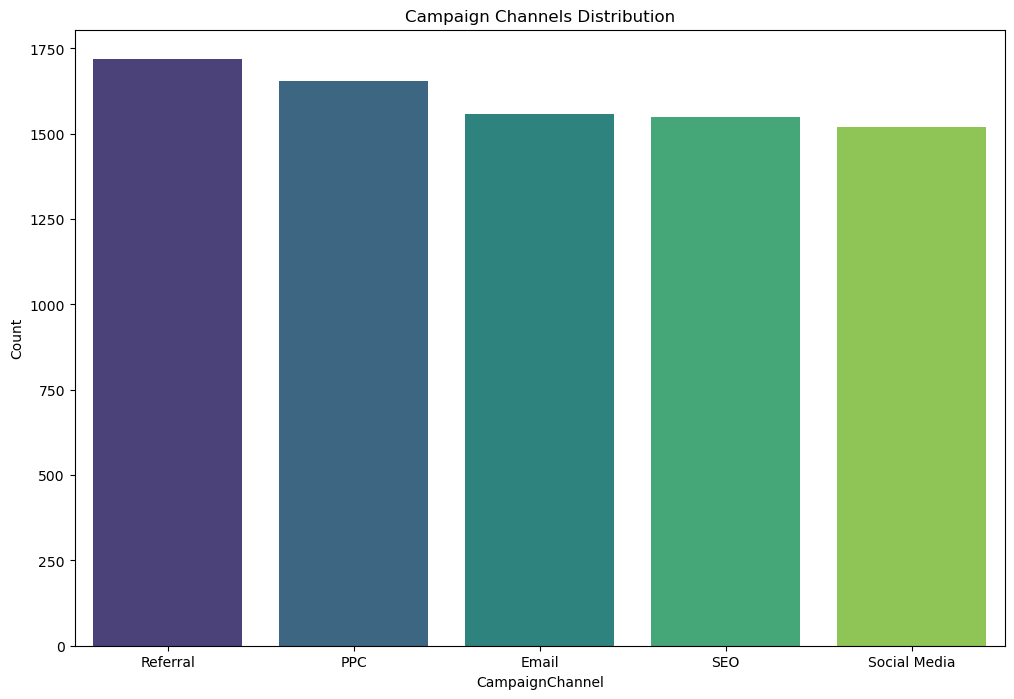

In [9]:
#plot bar plot for campaign channels
plt.figure(figsize=(12,8))

x = df['CampaignChannel'].value_counts().index
y = df['CampaignChannel'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Channels Distribution')
plt.ylabel('Count');


All channels are mostly used but the most used campaign channel is **Referrals** with (1719)

#### 1.4 Campaign type

In [10]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

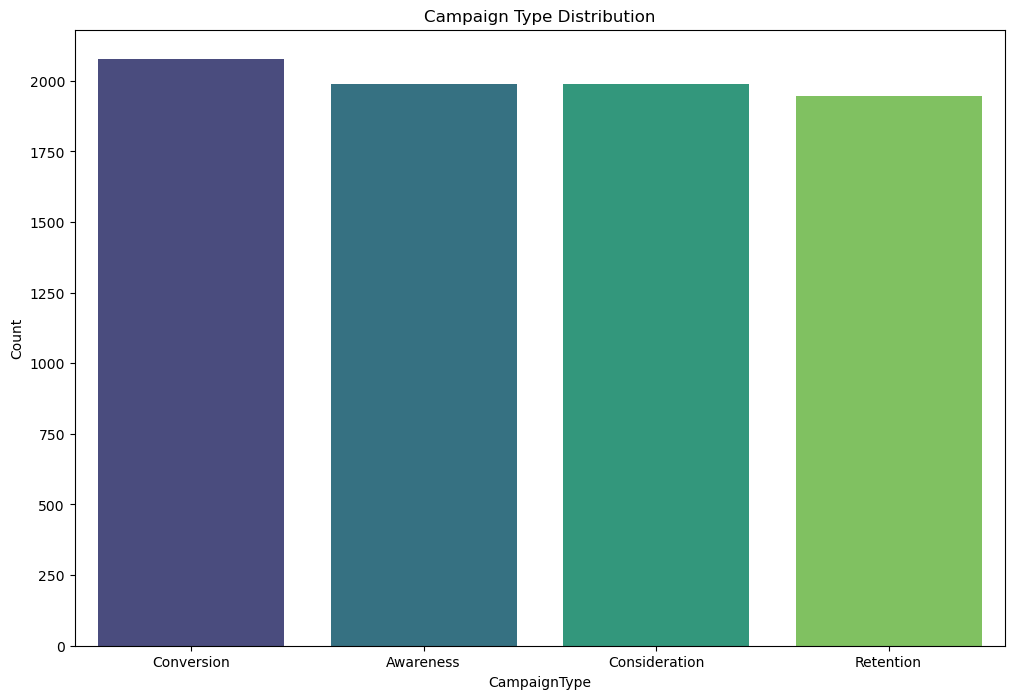

In [11]:
#plot bar plot for campaign type
plt.figure(figsize=(12,8))

x = df['CampaignType'].value_counts().index
y = df['CampaignType'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Type Distribution')
plt.ylabel('Count');

All campaign types are almost equally used but the most used campaign type is **Conversion** with (2077).

### 2. Bivariate Analysis

#### 2.1 Analyzing age and Campaign type

In [12]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [13]:
age_campaign = df[['Age', 'CampaignType' ]]

# define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# bin the age columns into categories
age_campaign['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_campaign

,Age,CampaignType,AgeGroup
0,56,Awareness,55-64
1,69,Retention,65-74
2,46,Awareness,45-54
3,32,Conversion,25-34
4,60,Conversion,55-64
...,...,...,...
7995,21,Awareness,18-24
7996,43,Retention,35-44
7997,28,Consideration,25-34
7998,19,Consideration,18-24


In [14]:
# analyze channel usage by age group
campaign_type_by_age = age_campaign.groupby('AgeGroup')['CampaignType'].value_counts().unstack()
campaign_type_by_age

CampaignType,Awareness,Consideration,Conversion,Retention
AgeGroup,,,,
18-24,267,282,261,221
25-34,414,351,384,380
35-44,391,398,422,374
45-54,382,394,382,408
55-64,357,373,430,375
65-74,177,190,198,189


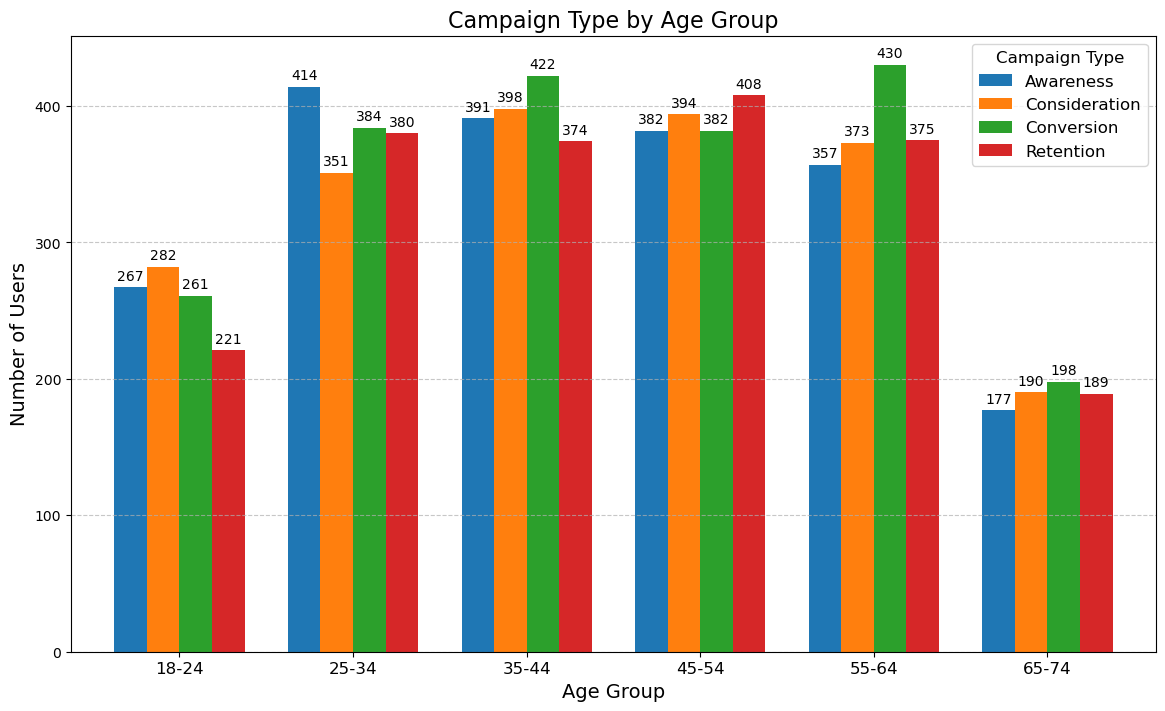

In [15]:
# Define color palette for distinct and contrasting colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot grouped bar chart
ax = campaign_type_by_age.plot(kind='bar', stacked=False, figsize=(14, 8), color=colors, width=0.75)

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Chart title and labels
plt.title('Campaign Type by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)

# Adjust legend and grid
plt.legend(title='Campaign Type', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The distribution of each campaign type (Awareness, Consideration, Conversion, Retention) is relatively balanced across all age groups, indicating that the company’s marketing strategy is consistently applied to all age groups.

The **18-24** age group - The numbers for this group are relatively lower compared to the other groups, with the highest engagement in the '**Consideration**' campaign (282 users) and the lowest in the 'Retention' campaign (221 users).
This suggests that while younger audiences are targeted by marketing campaigns, they are not as actively engaged as other age groups, possibly due to **different interests** or **lower purchasing power.**

**25-34**: This group shows strong engagement across all campaign types, with '**Awareness**' campaigns leading (414 users). This suggests that the 25-34 age group is particularly responsive to campaigns that introduce them to new products or services. 

**35-44**: This age group has the highest counts, especially in '**Conversion**' (422 users) and 'Consideration' (398 users). This could mean that middle-aged adults are a prime target for conversion efforts, likely due to **higher purchasing power** or **more decisive buying behavior.**

**45-54**: This group also shows strong engagement across all campaign types, with '**Retention**'campaigns edging the lead (408 users). This suggests a focus on retaining the customers. 

**55-64**: This age group has a higher response to '**Conversion**' campaigns (430 users) compared to 'Awareness', indicating a focus on converting existing leads rather than attracting new ones.

65-74: As previously noted, this age group has the lowest number of users across all campaigns, indicating lower engagement or targeting.



#### 2.2 Analyzing Age and previous purchases

In [16]:
age_ppurchases = df[['Age', 'PreviousPurchases']]
age_ppurchases

,Age,PreviousPurchases
0,56,4
1,69,2
2,46,8
3,32,0
4,60,8
...,...,...
7995,21,7
7996,43,5
7997,28,3
7998,19,7


In [17]:
# define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

age_ppurchases['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_ppurchases

,Age,PreviousPurchases,AgeGroup
0,56,4,55-64
1,69,2,65-74
2,46,8,45-54
3,32,0,25-34
4,60,8,55-64
...,...,...,...
7995,21,7,18-24
7996,43,5,35-44
7997,28,3,25-34
7998,19,7,18-24


In [18]:
age_ppurchases = age_ppurchases.drop('Age', axis=1)
age_ppurchases

,PreviousPurchases,AgeGroup
0,4,55-64
1,2,65-74
2,8,45-54
3,0,25-34
4,8,55-64
...,...,...
7995,7,18-24
7996,5,35-44
7997,3,25-34
7998,7,18-24


In [19]:
# group by agegroup and count
age_by_purchases = age_ppurchases.groupby('AgeGroup').count()
age_by_purchases

,PreviousPurchases
AgeGroup,
18-24,1031
25-34,1529
35-44,1585
45-54,1566
55-64,1535
65-74,754


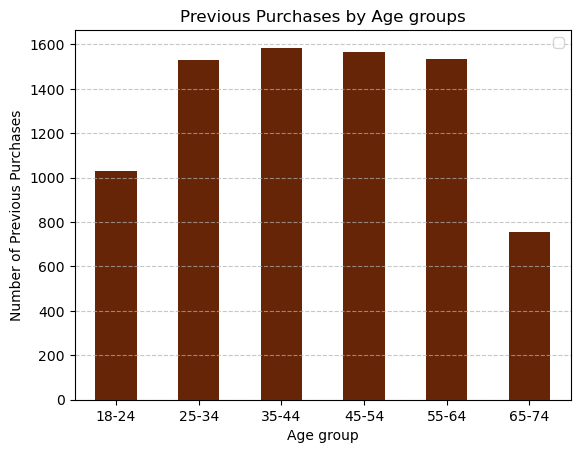

In [20]:
# plot a bar chart
age_by_purchases.plot(kind='bar', colormap='YlOrBr_r')
plt.xlabel('Age group')
plt.ylabel('Number of Previous Purchases')

# rotate x ticks
plt.xticks(rotation=0)

plt.title('Previous Purchases by Age groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[])
plt.show();

- **18-24**: seem to have a less previous purchases which maybe attributed to less purchasing power (1031).
- **34-44**: Have the highest previous purchases count (1585). 
- **25-34**, 45-64 and 55-64 : have high previous purchases (above 1500)
- **65-74**: This group has lowest previous purchases which maybe attributed by less engagement.


#### 2.3 Analyze campaign type and money spent on advertising

In [21]:
# group the columns
campaign_type_by_adspend = df[['CampaignType', 'AdSpend']]
campaign_type_by_adspend

,CampaignType,AdSpend
0,Awareness,6497.870068
1,Retention,3898.668606
2,Awareness,1546.429596
3,Conversion,539.525936
4,Conversion,1678.043573
...,...,...
7995,Awareness,8518.308575
7996,Retention,1424.613446
7997,Consideration,4609.534635
7998,Consideration,9476.106354


In [22]:
avg_adspend_by_campaigntype = campaign_type_by_adspend.groupby('CampaignType').agg({
    'AdSpend': 'mean'
})
avg_adspend_by_campaigntype

,AdSpend
CampaignType,
Awareness,5069.338947
Consideration,4960.399233
Conversion,4959.112653
Retention,5017.135162


<Figure size 1200x1000 with 0 Axes>

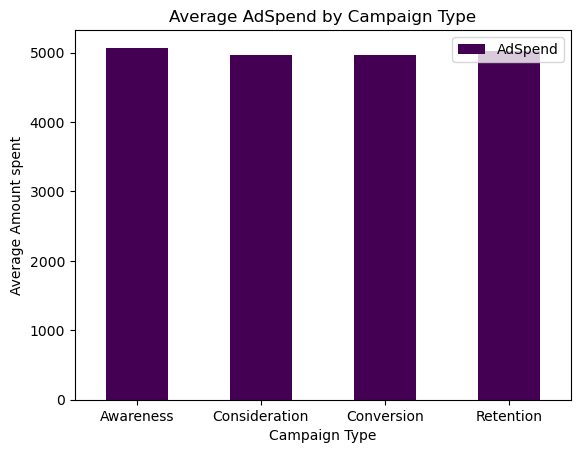

In [23]:
#plot visualization 
plt.figure(figsize=(12,10))

avg_adspend_by_campaigntype.plot(kind='bar', colormap='viridis')
plt.xlabel('Campaign Type')
plt.ylabel('Average Amount spent')
plt.title('Average AdSpend by Campaign Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show();



On average, they spend almost equally for all marketing campaigns types. However, 'Awareness' edges the spend with just over ($5000). 

#### 2.4 Analyzing Previous purchases impact on conversion

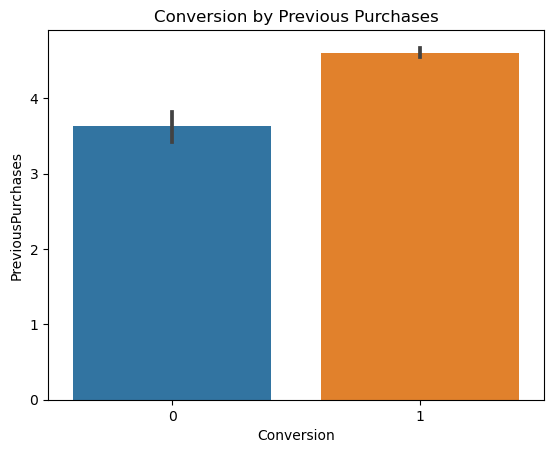

In [24]:
# barplot visualization
sns.barplot(data=df, x='Conversion', y='PreviousPurchases')
plt.title('Conversion by Previous Purchases')
plt.show();

The individuals with more previous purchases seems to result in a higher conversion.

#### 2.4 Analyzing Loyalty Points impact on conversion

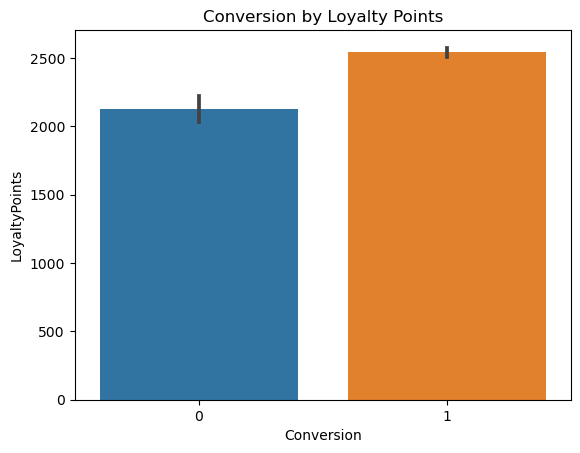

In [25]:
sns.barplot(data=df, x='Conversion', y='LoyaltyPoints')
plt.title('Conversion by Loyalty Points')
plt.show()

Higher loyalty points results to more conversion (1)

## Modeling

In [26]:
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

### Dropping irrelevant columns

In [28]:
# Drop AdvertisingPlatform , AdvertisingTool
df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'], inplace=True)

### Split data

In [29]:
# define target and feature variables
y = df['Conversion']
X = df.drop(columns=['Conversion', 'CustomerID'], axis=1)

X

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709


In [30]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### One Hot Encoding

In [31]:
# get the categorical data for encoding
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')



In [32]:
# create dummy variably for categorical variables

ohe = OneHotEncoder(drop='first', sparse_output=False)

# fit the encoder
ohe.fit(X_train_cat)


# transform the training and testing data
X_train_cat_ohe = pd.DataFrame(
    data= ohe.transform(X_train_cat),
    columns= ohe.get_feature_names_out(X_train_cat.columns),
    index = X_train_cat.index
)

X_test_cat_ohe = pd.DataFrame(
    data=ohe.transform(X_test_cat),
    columns=ohe.get_feature_names_out(X_test_cat.columns),
    index= X_test_cat.index
)



### Scaling the data

In [33]:
# get numerical data for scaling
X_train_num = X_train.select_dtypes(exclude='object')
X_test_num = X_test.select_dtypes(exclude='object')

In [34]:
# initialize scaler
scaler = MinMaxScaler()

# fit the scaler
scaler.fit(X_train_num)

X_train_num_scaled = pd.DataFrame(
    data=scaler.transform(X_train_num),
    index=X_train_num.index,
    columns=X_train_num.columns
)

X_test_num_scaled = pd.DataFrame(
    data=scaler.transform(X_test_num),
    index=X_test_num.index,
    columns=X_test_num.columns
)


In [35]:
# combine the scaled numerical data with the encoded categorical data

X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis=1)


### Model Iterations

Created many models for this project. The vanilla model <code>Logistic Model</code> was used as the baseline. Other models built <code>DecisionTreeClassifier</code> and <code>XGBOOST</code>. The models were modelled with and without smote to counteract class imblance.

#### Vanilla model

##### Logistic Regression Model

In [36]:
# define a model function

def logmodel(X_train, X_test, y_train, y_test):
    """
    Function to train a logistic regression model, predict on train and test data, 
    and evaluate the model performance.
    """
    # Initiate the logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

    # Fit the model
    logreg.fit(X_train, y_train)
     
    # Predictions on training and testing data
    y_hat_train = logreg.predict(X_train)
    y_hat_test = logreg.predict(X_test)

    # Model evaluation
    
    # Get accuracy for train and test
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)

    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print("------------------------------------")
    
    # Create a confusion matrix
    print("Confusion Matrix")
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.show()
    
    # Get classification report
    report = classification_report(y_test, y_hat_test, target_names=['No', 'Yes'])

    print("Classification Report")
    print("------------------------------------")
    print(report)
    
    return logreg

Before addressing class imbalance:
Train Accuracy: 0.88, Test Accuracy: 0.88
------------------------------------
Confusion Matrix


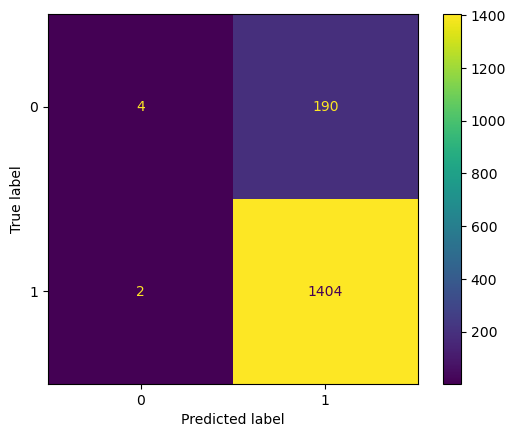

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.67      0.02      0.04       194
         Yes       0.88      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.77      0.51      0.49      1600
weighted avg       0.85      0.88      0.83      1600



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [37]:
# Evaluate the model before addressing class imbalance
print("Before addressing class imbalance:")
logmodel(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

##### Model Results Interpretation 


CONFUSION MATRIX

 --------------

Model Performance Analysis:
- High True Positives (1404): The model correctly identifies most of the "Yes" cases, indicating good performance for these predictions.
- Low True Negatives (4): The model rarely predicts "No" when the actual label is "No".
- High False Positives (190): The model frequently predicts "Yes" when the actual label is "No", which is a significant source of error.
- Low False Negatives (2): The model rarely misses "Yes" cases, meaning it’s good at identifying "Yes" instances.

Classification Report

----

 - The accuracy is around 88%, which is relatively high.
 - The precision is about 88%, meaning that when the model predicts "Yes", it’s correct 88% of the time and when the model predicts "No", it is correct about 67% of the time. This is a problem. 
 - The recall is very high (99.9%), indicating the model is excellent at identifying all actual "Yes" cases. However, when the model is identifying actuall "No" cases, it is hardly correct 2% of the time, indicating a significant problem.
 - The F1-Score is about 94%, which suggests a good balance between precision and recall. On the otherhand, F1 score is about 4% which suggests an aweful imbalance between precision and recall for the "No" cases.


This may be attributed to class imbalance    'Target distribution' 

                                        Conversion
                                        1    7012
                                        0     988

Given the business context of optimizing campaign conversions:

**High Recall** is crucial since you want to capture as many potential conversions as possible.

**Precision** is also important to ensure that resources are not wasted on users unlikely to convert.


Thus, balancing between precision and recall while reducing false positives would help allocate marketing resources more effectively and improve overall campaign efficiency.

#### Logistic Regression - iteration #1

For the first iteration of the logistic regression model, **SMOTE** is incorporated in an attempt to address class imbalance

In [38]:
# address class imbalance using SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

Conversion
1    5606
0    5606
Name: count, dtype: int64


Train Accuracy: 0.68, Test Accuracy: 0.69
------------------------------------
Confusion Matrix


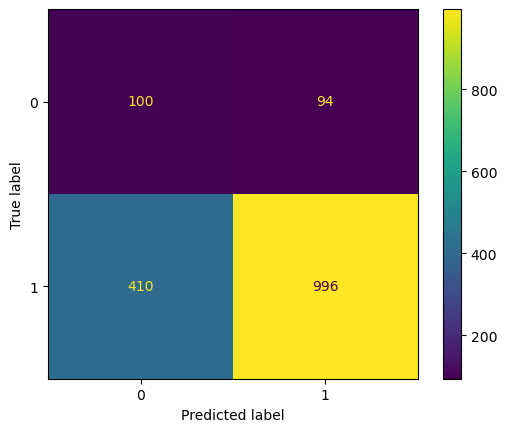

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.20      0.52      0.28       194
         Yes       0.91      0.71      0.80      1406

    accuracy                           0.69      1600
   macro avg       0.55      0.61      0.54      1600
weighted avg       0.83      0.68      0.74      1600



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [39]:
# Evaluate the model after addressing class imbalance
logmodel(X_train_resampled, X_test_preprocessed, y_train_resampled, y_test)

CONFUSION MATRIX

 --------------

- True Negatives (TN): 100 — The model correctly predicted 100 instances as 'No Conversion' when there was indeed no conversion.
- False Positives (FP): 94 — The model incorrectly predicted 94 instances as 'Conversion' when there was no conversion.
- False Negatives (FN): 410 — The model incorrectly predicted 410 instances as 'No Conversion' when there was actually a conversion.
- True Positives (TP): 996 — The model correctly predicted 996 instances as 'Conversion' when there was indeed a conversion.

Classification Report

----

- The overall model accuracy reduced from the vanila model 88% to 69%.
- True Positive Rate (Recall): The model correctly identifies a significant portion of actual conversions (997 out of 1406 actual conversions), but a substantial number of actual conversions are still missed (409 instances).
- Precision: The proportion of predicted conversions that are actually conversions (997 out of 1087 predicted conversions) is somewhat moderate, indicating the model also makes some incorrect predictions when identifying conversions.


Impact of SMOTE:
- Reduction in False Negatives: Before using SMOTE, there were fewer False Negatives because the model was biased towards predicting the majority class (likely 'No Conversion'). After applying SMOTE, the model was exposed to a balanced dataset, which increased its ability to predict 'Conversion'. However, while it increased sensitivity (recall), it also increased the number of False Positives.

#### Logistic Regression - iteration #2

In an attempt to optimize performance of the models, looked at the feature importances and narrowed the features based on the results.
Incorporated Filter Method as a feature selection method. Firstly used the filter method and then SMOTE so as to apply SMOTE on the relevant features and avoid any potential bias introduced by synthetic samples during feature selection.

In [40]:
# filter method
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Feature selection before SMOTE
selector = SelectKBest(score_func=mutual_info_classif)

#fit data
X_train_kbest = selector.fit_transform(X_train_preprocessed, y_train)

#transform test data
X_test_kbest = selector.transform(X_test_preprocessed)


Train Accuracy: 0.56, Test Accuracy: 0.77
------------------------------------
Confusion Matrix


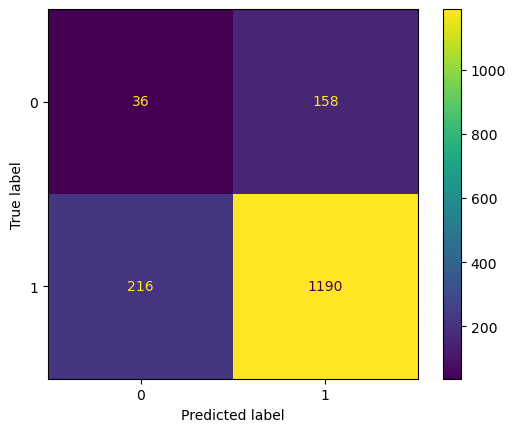

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.14      0.19      0.16       194
         Yes       0.88      0.85      0.86      1406

    accuracy                           0.77      1600
   macro avg       0.51      0.52      0.51      1600
weighted avg       0.79      0.77      0.78      1600



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [41]:

#apply SMOTE to selected Features
smote = SMOTE(random_state=42)

#Fit
X_train_kbest_resampled, y_train_kbest_resampled = smote.fit_resample(X_train_kbest, y_train)

#train
logmodel(X_train_kbest_resampled, X_test_kbest, y_train_kbest_resampled, y_test)




The precision and recall are still very low for "No" class(0). 
The Model is still finding it difficult to classify "No": customers who do not convert. 


#### DECISION TREE

##### Decision Tree - Iteration #1

For the first Decision Tree model, preprocessed data was used before SMOTE

In [82]:
def dtmodel(X_train, X_test, y_train, y_test):
    """ 
    Function to instantiate the classifier, fit, train, 
    predict and model evaluation
    """

    # instantiate classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

    # fit
    clf.fit(X_train, y_train)

    # predict
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # model evaluation

    # Get accuracy for train and test
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)

    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print("------------------------------------")
    
    # confusion Matrix
    print('Confusion matrix')
    print('-----------------------')
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.show()

    print('Classification Report')
    print('-----------------------')

    report = classification_report(y_test, y_hat_test)

    print(report)

Train Accuracy: 1.00, Test Accuracy: 0.83
------------------------------------
Confusion matrix
-----------------------


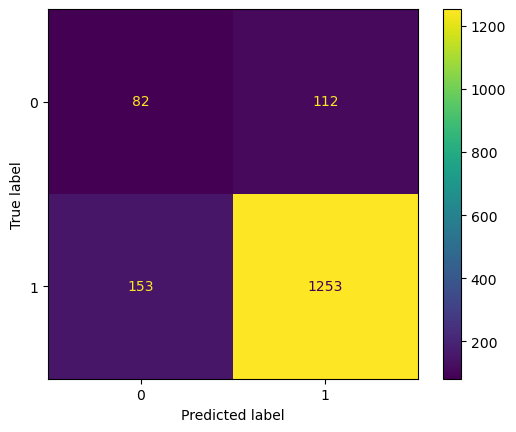

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.35      0.42      0.38       194
           1       0.92      0.89      0.90      1406

    accuracy                           0.83      1600
   macro avg       0.63      0.66      0.64      1600
weighted avg       0.85      0.83      0.84      1600



In [83]:
# first classifier iteration
dtmodel(X_train_preprocessed, X_test_preprocessed,y_train, y_test)

The model may suggest overfitting as it has a perfect train accuracy(100%) and a lower test accuracy(83%).   
An improved recall of 42% was observed.

##### Decision Tree - iteration #2

Applied SMOTE on this decision tree iteration. To counter class imbalance

Train Accuracy: 1.00, Test Accuracy: 0.80
------------------------------------
Confusion matrix
-----------------------


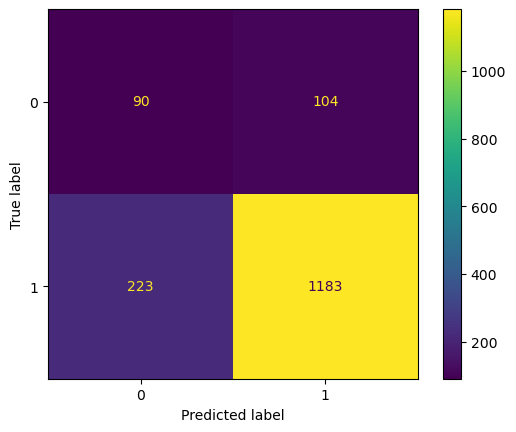

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.29      0.46      0.36       194
           1       0.92      0.84      0.88      1406

    accuracy                           0.80      1600
   macro avg       0.60      0.65      0.62      1600
weighted avg       0.84      0.80      0.82      1600



In [84]:
# applying smote
smote = SMOTE()

X_train_dt_resampled, y_train_dt_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# call model
dtmodel(X_train_dt_resampled, X_test_preprocessed, y_train_dt_resampled, y_test)

The model still seems to overfit

##### Decision Tree - Iteration #3

Incorporated Feature selection method 

In [85]:
# feature selection using KBest
selector =  SelectKBest(score_func=mutual_info_classif)

#fit data
X_train_dt_kbest = selector.fit_transform(X_train_preprocessed, y_train)

#transform test data
X_test_dt_kbest = selector.transform(X_test_preprocessed)

Train Accuracy: 1.00, Test Accuracy: 0.78
------------------------------------
Confusion matrix
-----------------------


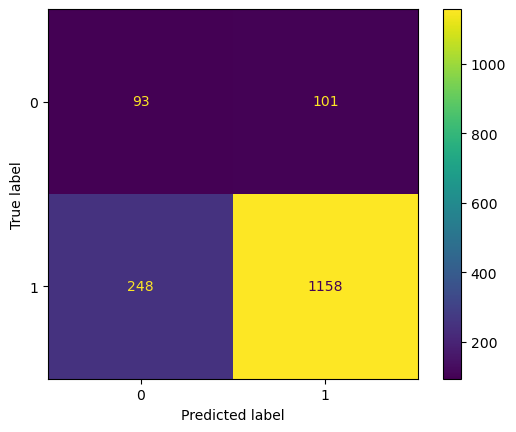

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.27      0.48      0.35       194
           1       0.92      0.82      0.87      1406

    accuracy                           0.78      1600
   macro avg       0.60      0.65      0.61      1600
weighted avg       0.84      0.78      0.81      1600



In [86]:
# applying smote
smote = SMOTE()

X_train_dt_kbest_resampled, y_train_dt_kbest_resampled = smote.fit_resample(X_train_dt_kbest, y_train)

# call model
dtmodel(X_train_dt_kbest_resampled, X_test_dt_kbest, y_train_dt_kbest_resampled, y_test)

The model is still overfitting, the model is not performing very well

#### XGBOOST

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Basically, decision trees on steroids

##### XGBOOST - Iteration #1

Apply XGBOOST on the preprocessed data without modification

In [112]:
def xgboost(X_train, X_test, y_train, y_test):
    # instantiate
    bst = XGBClassifier(objective='binary:logistic', random_state=42)

    # fit model
    bst.fit(X_train, y_train)

    # predictions 
    y_hat_train = bst.predict(X_train)
    y_hat_test = bst.predict(X_test)
    
    # Get accuracy for train and test
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)
    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print("------------------------------------")

    # confusion Matrix
    print('Confusion matrix')
    print('-----------------------')
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.show()

    print('Classification Report')
    print('-----------------------')

    report = classification_report(y_test, y_hat_test)
    print(report)

    return bst

Train Accuracy: 1.00, Test Accuracy: 0.92
------------------------------------
Confusion matrix
-----------------------


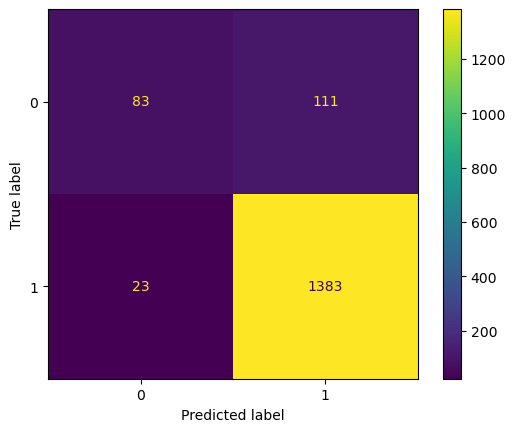

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       194
           1       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.85      0.71      0.75      1600
weighted avg       0.91      0.92      0.91      1600



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [113]:
# first model before smote
xgboost(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

An improvement in the overall quality of the model. The model seems to generlize well on the data. An improved precision and recall for the 0 class

##### XGBOOST - Iteration #2

Using SMOTE

Train Accuracy: 1.00, Test Accuracy: 0.79
------------------------------------
Confusion matrix
-----------------------


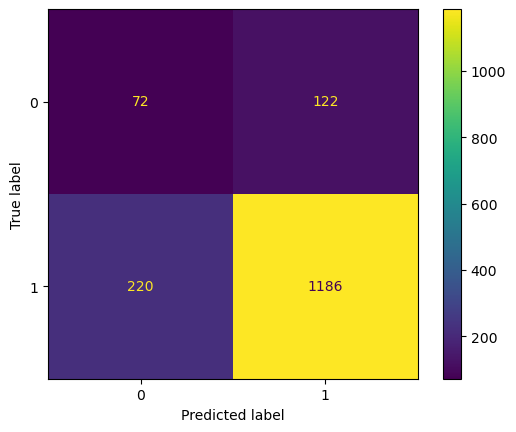

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.25      0.37      0.30       194
           1       0.91      0.84      0.87      1406

    accuracy                           0.79      1600
   macro avg       0.58      0.61      0.59      1600
weighted avg       0.83      0.79      0.80      1600



In [114]:
# instantiate
smote = SMOTE(random_state=42)

# fit resample
X_train_xgb_resampled, y_train_xgb_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# call model
dtmodel(X_train_xgb_resampled, X_test_preprocessed, y_train_xgb_resampled, y_test)


Applying SMOTE lead to the model overfitting. Reduced its performance. 

##### XGBOOST - Iteration #3

Apply feature selection without SMOTE

In [115]:
# feature selection using KBest
selector =  SelectKBest(score_func=mutual_info_classif)

#fit data
X_train_xgb_kbest = selector.fit_transform(X_train_preprocessed, y_train)

#transform test data
X_test_xgb_kbest = selector.transform(X_test_preprocessed)

Train Accuracy: 1.00, Test Accuracy: 0.90
------------------------------------
Confusion matrix
-----------------------


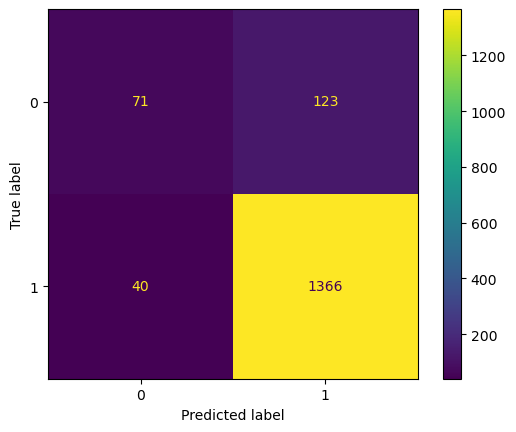

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.64      0.37      0.47       194
           1       0.92      0.97      0.94      1406

    accuracy                           0.90      1600
   macro avg       0.78      0.67      0.70      1600
weighted avg       0.88      0.90      0.89      1600



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
# model
xgboost(X_train_xgb_kbest, X_test_xgb_kbest, y_train, y_test)

This model is performing well, no overfitting


##### XGBOOST - Iteration #4

Adjusteed using feature selection methods and SMOTE

In [117]:
# feature selection using KBest
selector =  SelectKBest(score_func=mutual_info_classif)

#fit data
X_train_xgb_kbest = selector.fit_transform(X_train_preprocessed, y_train)

#transform test data
X_test_xgb_kbest = selector.transform(X_test_preprocessed)

Train Accuracy: 1.00, Test Accuracy: 0.80
------------------------------------
Confusion matrix
-----------------------


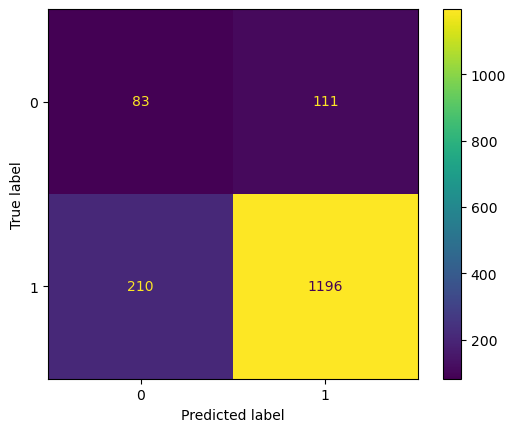

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.28      0.43      0.34       194
           1       0.92      0.85      0.88      1406

    accuracy                           0.80      1600
   macro avg       0.60      0.64      0.61      1600
weighted avg       0.84      0.80      0.82      1600



In [118]:
# instantiate
smote = SMOTE(random_state=42)

# fit resample
X_train_xgb_kbest_resampled, y_train_xgb_kbest_resampled = smote.fit_resample(X_train_xgb_kbest, y_train)

# call model
dtmodel(X_train_xgb_kbest_resampled, X_test_xgb_kbest, y_train_xgb_kbest_resampled, y_test)

The model is overfitting

##### XGBOOST - Iteration #5

Since the first XGBOOST has the best performance, why not get the best parameters for it. Used Grid Search CV to get the best parameters.

In [123]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
Best score:  0.9203125


Train Accuracy: 0.94, Test Accuracy: 0.92
------------------------------------
Confusion matrix
-----------------------


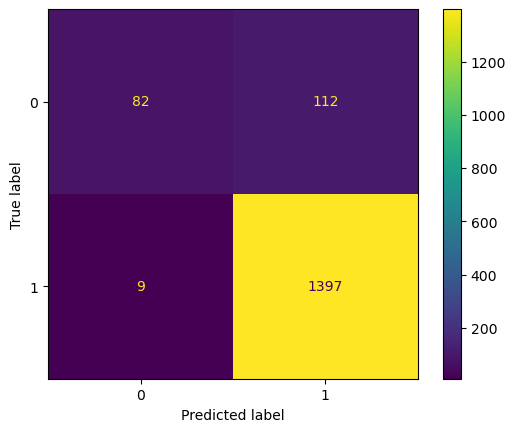

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.90      0.42      0.58       194
           1       0.93      0.99      0.96      1406

    accuracy                           0.92      1600
   macro avg       0.91      0.71      0.77      1600
weighted avg       0.92      0.92      0.91      1600



In [124]:
# Create the XGBoost model object
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42,
                          learning_rate=0.1,
                          max_depth=3,
                          subsample=0.7)

# fit model
xgb_model.fit(X_train_preprocessed, y_train)
# predictions 
y_hat_train = xgb_model.predict(X_train_preprocessed)
y_hat_test = xgb_model.predict(X_test_preprocessed)

# Get accuracy for train and test
train_accuracy = accuracy_score(y_train, y_hat_train)
test_accuracy = accuracy_score(y_test, y_hat_test)
print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
print("------------------------------------")

# confusion Matrix
print('Confusion matrix')
print('-----------------------')
cnf_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

#classification Report
print('Classification Report')
print('-----------------------')
report = classification_report(y_test, y_hat_test)
print(report)

The model is performing relatively well

### Evaluation

Key Metric to look out for, high precision and recall.

----


**Model 1 : LOGISTIC REGRESSION (BASE MODEL)**

- Train Accuracy: 0.88
- Test Accuracy: 0.88
- Key Observations:


    - The precision is about 88%, meaning that when the model predicts (1) "Yes", it’s correct 88% of the time and when the model predicts (0)"No", it is correct about 67% of the time.

    - The recall is very high (99.9%), indicating the model is excellent at identifying all actual "Yes" cases. However, when the model is identifying actuall "No" cases, it is hardly correct 2% of the time. 
   
    
    - The F1-Score is about 94%, which suggests a good balance between precision and recall. On the otherhand, F1 score is about 4% which suggests an aweful imbalance between precision and recall for the "No" cases.

-----

**Model 2 : LOGISTIC REGRESSION (SMOTE)**

- Train Accuracy: 0.68  

- Test Accuracy: 0.69

- Key Observations:

    - The recall for identifying the "No" increaased by abit. otherwise, the model performs almost as the vanila model. 
    - The accuracy dropped in this model. 

-----

**Model 3 : LOGISTIC REGRESSION (SMOTE + Filter Method)**

- Train Accuracy: 0.56

- Test Accuracy: 0.77

- Key observations:

    - The model seems to be underfitting from the accuracy scores.

    - The precision and recall are still very low for "No" class(0).The Model is still finding it difficult to classify "No": customers who do not convert. 

----

**Model 4 : DECISION TREE**

- Train Accuracy: 1.00

- Test Accuracy: 0.83

- Key observation:

    - The model may suggest overfitting as it has a perfect train accuracy(100%) and a lower test accuracy(83%). 
    - An improved recall of 42% was observed.

----

**Model 5 : DECISION TREE (SMOTE)**

- Train Accuracy: 1.00

- Test Accuracy: 0.80

- Key observations:

    - The model still seems to overfit. 

---- 

**Model 6 : DECISION TREE (SMOTE + Filter Method)**

- Train Accuracy: 1.00

- Test Accuracy: 0.78

- Key observations:

    - The model is still overfitting, the model is not performing very well

----

**Model 7 : XGBOOST**

- Train Accuracy: 1.00

- Test Accuracy: 0.92

- Key observations:

    - An improvement in the overall quality of the model. The model seems to generalize well on the data. 

    - An improved precision and recall for the 0 "No" class 78%  and 43% respectively. For the 1 "Yes" class 93% precision and 98% recall are very impressive results. 

    - The model is a significant improvement. 
    
---- 

**Model 8 : XGBOOST (SMOTE)**

- Train Accuracy: 1.00

- Test Accuracy: 0.79

- Key observations: 

    - Applying SMOTE lead to the model overfitting. Reduced its performance

----

**Model 9 : XGBOOST (Filter Methods)**

- Train Accuracy: 1.00

- Test Accuracy: 0.90

- Key observations:

    - This model is performing well, no overfitting. 


----

**Model 10 : XGBOOST (Filter Methods + SMOTE)**

- Train Accuracy: 1.00

- Test Accuracy: 0.80

- Key observations:

    - Model performance reduced.
     
    - The model is overfitting.

----

**Model 11 : XGBOOST (GRID SEARCH CV)**

- Train Accuracy: 0.94

- Test Accuracy: 0.92

- Key observation:

    - The precision is about 93%, meaning that when the model predicts (1) "Yes", it’s correct 88% of the time and when the model predicts (0)"No", it is correct about 90% of the time. 

    - The recall is very high (99%), indicating the model is excellent at identifying all actual "Yes" cases. However, when the model is identifying actuall "No" cases, it is correct 42% of the time.

    - Overally, this is a significant improvement and the best performing model.


### Conclusion